In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Comcast_telecom_complaints_data.csv')

In [3]:
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
# Provide the trend chart for the number of complaints at monthly and daily granularity levels.
data['Day'] = data['Date_month_year'].apply(lambda x:str(x).split('-')[0])
data['Month'] = data['Date_month_year'].apply(lambda x:str(x).split('-')[1])
data['Year'] = data['Date_month_year'].apply(lambda x:str(x).split('-')[2])

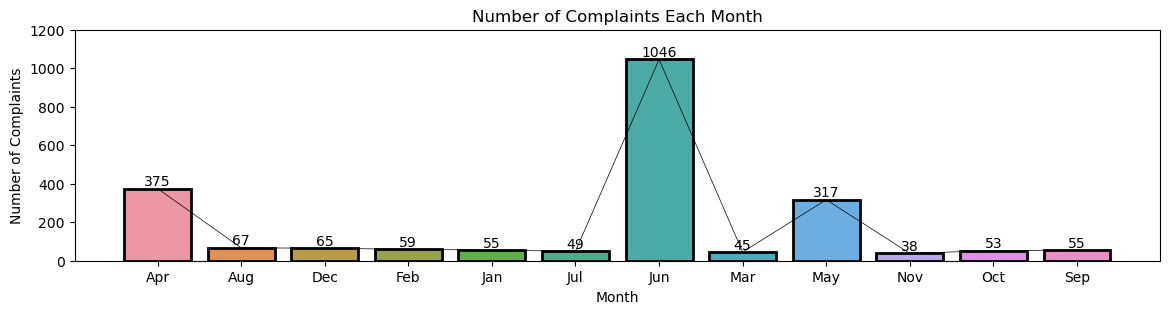

In [5]:
fig,ax = plt.subplots(figsize=(14,3))
y = data.groupby('Month')['Month'].count()
x = data.groupby('Month')['Month'].count().keys()
sns.barplot(x,y,ax=ax,ec='k',lw=2)
plt.plot(x,y,color='k',lw=.5)
ax.bar_label(ax.containers[0])
plt.ylim(0,1200)
plt.ylabel('Number of Complaints')
plt.xlabel('Month')
plt.title('Number of Complaints Each Month')
plt.show()

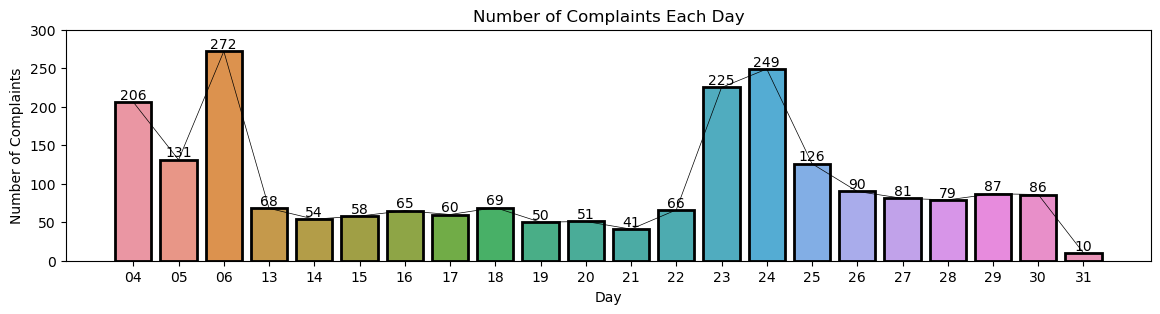

In [6]:
fig,ax = plt.subplots(figsize=(14,3))
y = data.groupby('Day')['Day'].count()
x = data.groupby('Day')['Day'].count().keys()
sns.barplot(x,y,ax=ax,ec='k',lw=2)
plt.plot(x,y,color='k',lw=.5)
ax.bar_label(ax.containers[0])
plt.ylim(0,300)
plt.ylabel('Number of Complaints')
plt.xlabel('Day')
plt.title('Number of Complaints Each Day')
plt.show()

In [7]:
# Provide a table with the frequency of complaint types.
complaints = pd.Series(data['Customer Complaint'].value_counts().keys(),)
frequency = pd.Series(data['Customer Complaint'].value_counts().values)
Complaint_Types = pd.concat([complaints,frequency],axis=1)
Complaint_Types.columns = ['Complaints Types','Frequency']

In [8]:
Complaint_Types.head()

,Complaints Types,Frequency
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Comcast Billing,11


In [9]:
# Create a new categorical variable with value as Open and Closed. 
# Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
def Open_Closed(x):
    if x == 'Open' or x == 'Pending':
        return 'Open'
    if x == 'Closed' or x == 'Solved':
        return 'Closed'

In [10]:
data['Open & Closed'] = data['Status'].apply(Open_Closed)

In [11]:
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Day,Month,Year,Open & Closed
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,Apr,15,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,04,Aug,15,Closed
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18,Apr,15,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,05,Jul,15,Open
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26,May,15,Closed


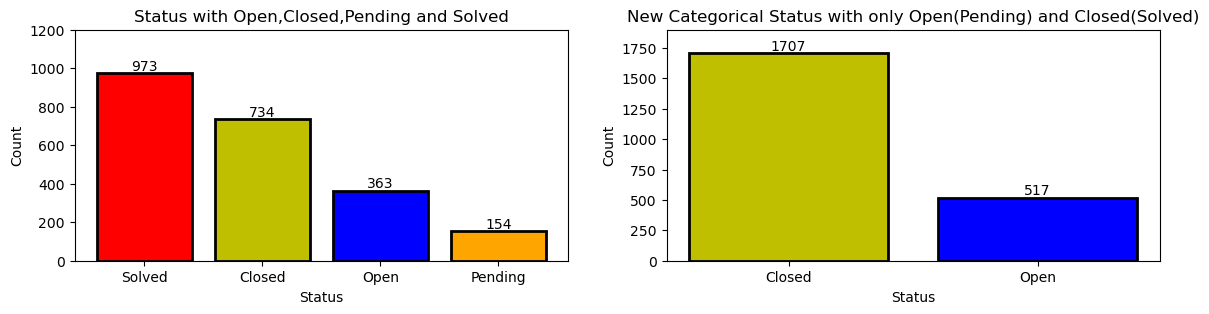

In [12]:
x = data['Status'].value_counts().keys()
y = data['Status'].value_counts()
a = data['Open & Closed'].value_counts().keys()
b = data['Open & Closed'].value_counts()
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
status = plt.bar(x,y,color=['r','y','b','orange'],ec='k',lw=2)
plt.bar_label(status,y)
plt.ylim(0,1200)
plt.ylabel('Count')
plt.xlabel('Status')
plt.title('Status with Open,Closed,Pending and Solved')

plt.subplot(1,2,2)
O_C = plt.bar(a,b,color=['y','b'],ec='k',lw=2)
plt.bar_label(O_C,b)
plt.ylim(0,1900)
plt.ylabel('Count')
plt.xlabel('Status')
plt.title('New Categorical Status with only Open(Pending) and Closed(Solved)')
plt.show()

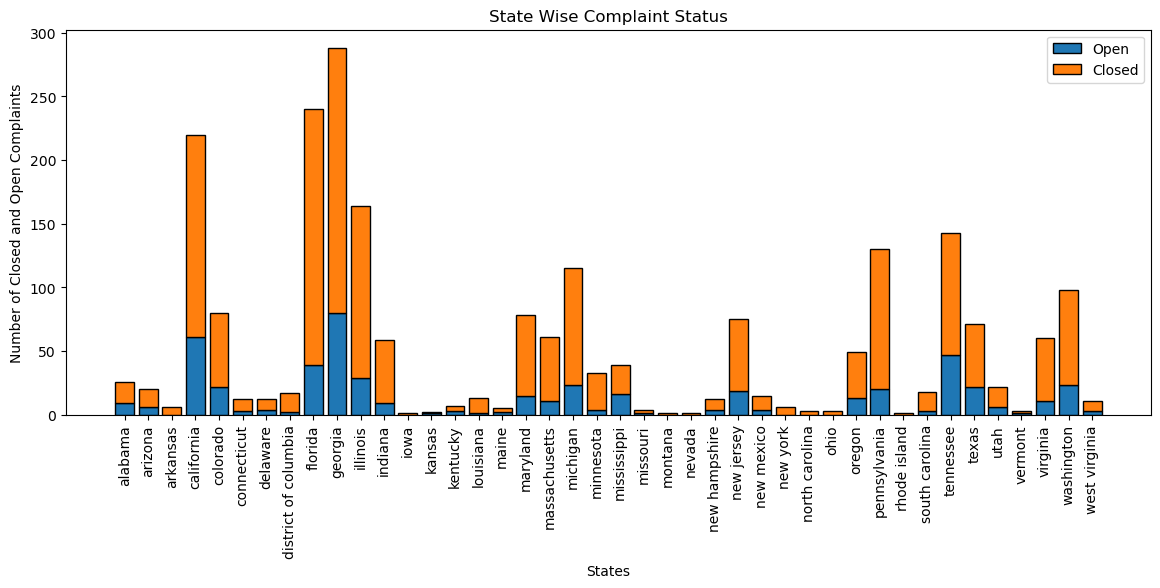

In [13]:
# Provide state wise status of complaints in a stacked bar chart. 
# Use the categorized variable from Q3. Provide insights on:
data['State'] = data['State'].str.lower()
complaint = data.groupby(['State','Open & Closed'])['State'].count().unstack('Open & Closed').fillna(0)
x = complaint.index
a = complaint.Open.values
b = complaint.Closed.values
plt.figure(figsize=(14,5))
Open = plt.bar(x,a,ec='k')
Closed = plt.bar(x,b,bottom=a,ec='k')
plt.xticks(rotation=90)
plt.legend(labels=['Open','Closed'])
plt.ylabel('Number of Closed and Open Complaints')
plt.xlabel('States')
plt.title('State Wise Complaint Status')
plt.show()

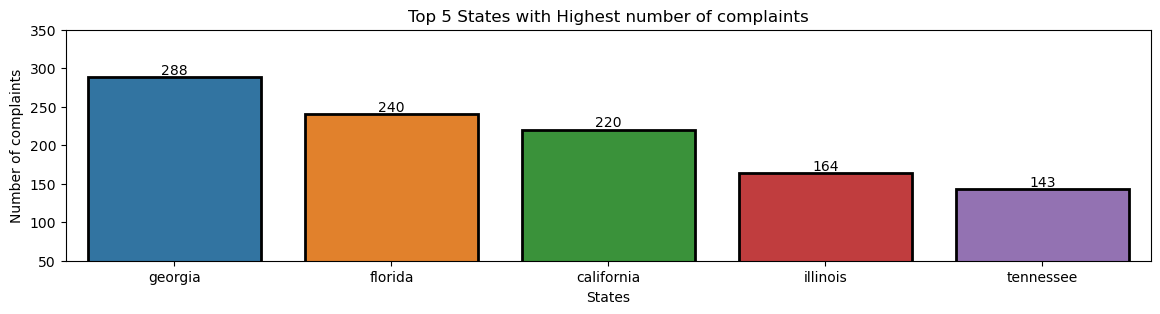

In [14]:
# Which state has the maximum complaints
a = data.groupby('State')['State'].count().sort_values(ascending=False)[:5]
b = data.groupby('State')['State'].count().sort_values(ascending=False)[:5].keys()
fig,ax = plt.subplots(figsize=(14,3))
sns.barplot(b,a,ec='k',lw=2,ax=ax)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=0)
plt.ylim(50,350)
plt.xlabel('States')
plt.ylabel('Number of complaints')
plt.title('Top 5 States with Highest number of complaints')
plt.show()

In [15]:
# Which state has the highest percentage of unresolved complaints
complaint['Total_Complaints'] = complaint['Open']+complaint['Closed']
complaint['unresolved_%'] = round((complaint['Open']/complaint['Total_Complaints'])*100,2)
complaint = complaint.sort_values(by='unresolved_%',ascending=False)

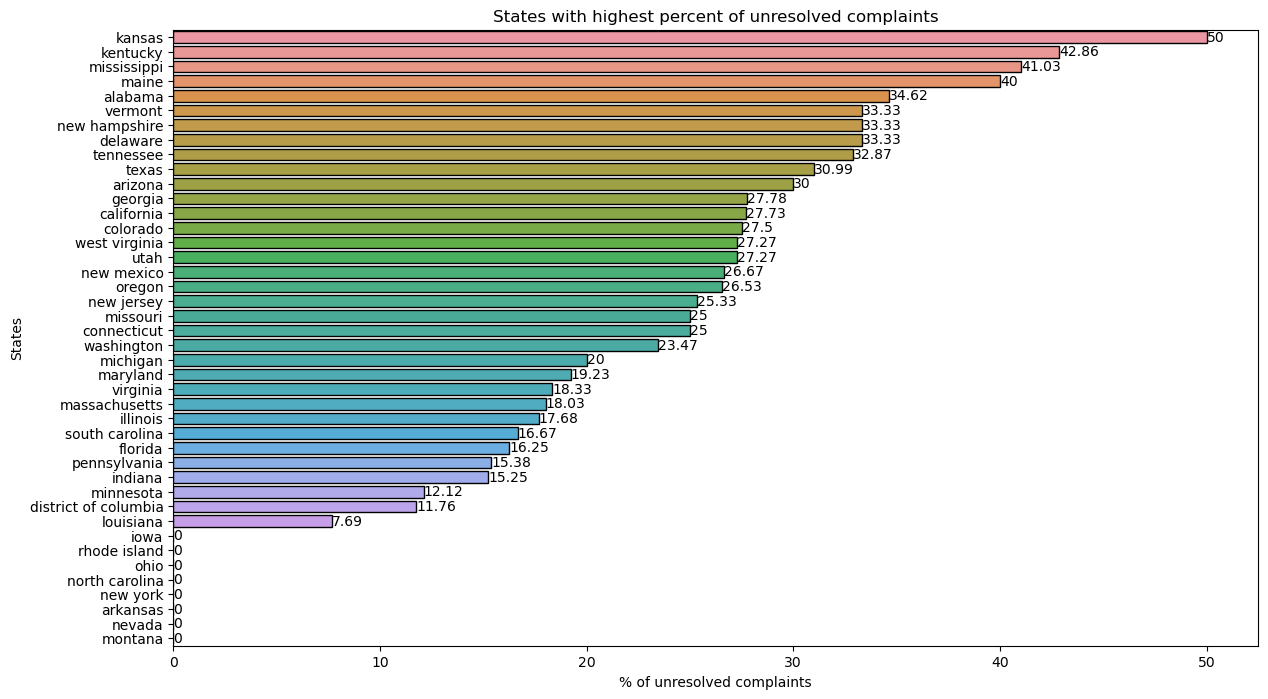

In [16]:
fig,ax = plt.subplots(figsize=(14,8))
sns.barplot(complaint['unresolved_%'].values,complaint['unresolved_%'].keys(),ec='k')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=0)
plt.ylabel('States')
plt.xlabel('% of unresolved complaints')
plt.title('States with highest percent of unresolved complaints')
plt.show()

In [17]:
# Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.
complaints = data.groupby('Received Via')['Open & Closed'].value_counts().unstack('Open & Closed')
complaints['Total_Complaints'] = complaints['Open']+complaints['Closed']
complaints['Resolved'] = round((complaints['Closed']/complaints['Total_Complaints'])*100,2)
complaints

Open & Closed,Closed,Open,Total_Complaints,Resolved
Received Via,,,,
Customer Care Call,864,255,1119,77.21
Internet,843,262,1105,76.29


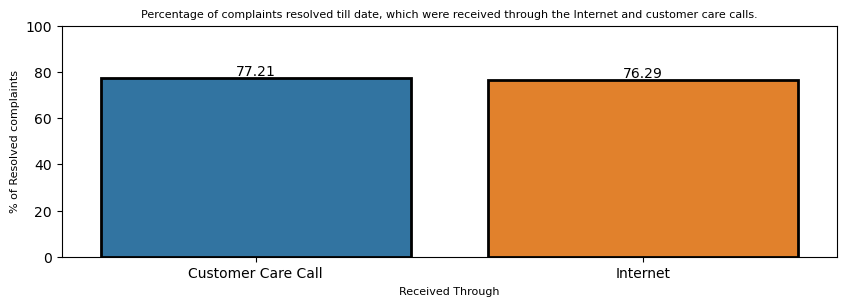

In [19]:
fig,ax = plt.subplots(figsize=(10,3))
sns.barplot(complaints['Resolved'].keys(),complaints['Resolved'].values,ec='k',lw=2)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=0)
plt.ylim(0,100)
plt.xlabel('Received Through',fontsize=8)
plt.ylabel('% of Resolved complaints',fontsize=8)
plt.title('Percentage of complaints resolved till date, which were received \
through the Internet and customer care calls.',fontsize=8)
plt.show()